In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys

# import module
from graphviz import Digraph 
import graphviz
from PIL import Image

sys.path.append("../src")
from illustrate import *

(-0.5, 10.5, -0.5, 10.5, 0.0, 10.0)

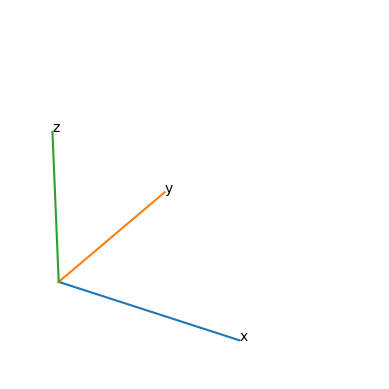

In [2]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the X, Y, and Z axes
P3.coordinates([0,0,0], 10, ax = ax)

ax.grid(False)
ax.axis("off")


In [66]:
def genGraph(name, nodes, edges, rankdir = "LR", 
             color = None, **kwags):
    dot = Digraph(name)
    dot.attr(rankdir = rankdir, color = color, **kwags)
    dot.attr("node", shape = "rect", style ="rounded")

    # Adding nodes
    for k in nodes:
        dot.node(k[0], k[1])
    
    # adding edges
    for k in edges:
        cons = k[3] if len(k) > 3 else "true"  
        dot.edge(k[0], k[1], label = k[2], 
                 constraint = cons)
    
    return dot

def viewGraph(dot, filename, cleanup = True):
    file, ext = filename, "jpg"
    dot.format = ext
    dot.render(file, view = False, cleanup = cleanup)
    return Image.open(file + "." + ext)

def loadGraph(file):
    dot = graphviz.Source.from_file(file)
    return dot

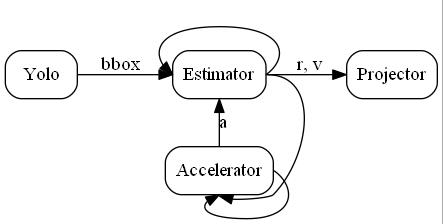

In [ ]:
# nodes
n1 = [ ['yolo', 'Yolo'], ["proj", "Projector"]       ]
n2 = [ ['est', 'Estimator'],
      ['acc', 'Accelerator']     ]

# edges
e1 = [ ["yolo", "est", "bbox"],
      ['est', 'proj', "r, v"] ]

e2 = [ ['acc', 'est', "a", "false"],
    ["acc:e", "acc:s", "", "false"],
    ["est:e", "est:w", "", "false"],
    ["est:e", "acc:s", "", "false"] ]

dot = genGraph("flow1", n1, e1, comment="Network")
c1 = genGraph("cluster1", n2, e2, color="white")
dot.subgraph(c1)
img = viewGraph(dot, "flow1")
img

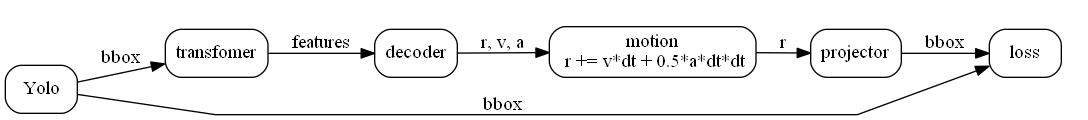

In [ ]:
n1 = [ ('yolo', 'Yolo'), ('est', 'transfomer'),
      ("dec", "decoder") ]

e1 = [("yolo", "est", "bbox"), ('est', 'dec', "features"),
      ('dec', 'mot', "r, v, a"), ("yolo", "loss", "bbox") ]

n2 = [("mot", "motion\n r += v*dt + 0.5*a*dt*dt"),
    ("proj", 'projector'), ("loss", "loss")]

e2 = [("mot", "proj", "r"),
      ("proj", "loss", "bbox") ]

dot = genGraph("flow2", n1, e1, splines = "ortho")
c1 = genGraph("cluster1", n2, e2, rankdir="TB", color="white", splines = "ortho")
dot.subgraph(c1)

img = viewGraph(dot, "flow2")
img

In [ ]:
# the structure of motion
n1 = [("object", "(r, v, a, size)"), ("")]

git add src/illustrate.py src/pnn.py src/pworld.py test/test_pnn.py theory/illustrate.ipynb 
